<a href="https://colab.research.google.com/github/ipevendelin/Nonlinear-Dimensionality-Reduction/blob/main/task_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and scaling

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pathlib import Path
import kagglehub



# Dataset
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

# Construct the correct path to the CSV file within the downloaded dataset
csv_path = Path(path) / 'day.csv'

df = pd.read_csv(csv_path)

# Select features for DR
feature_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
                'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = df[feature_cols].values
y = df['cnt'].values  # total rental bikes

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures used: {feature_cols}")
print(f"Target: cnt (total rental bikes)")

Using Colab cache for faster access to the 'bike-sharing-dataset' dataset.
Path to dataset files: /kaggle/input/bike-sharing-dataset

Features used: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Target: cnt (total rental bikes)


# Overview

The dataset includes eleven features that were selected for this analysis. Features consist of
temporal variables and weatherrelated measurements. The target variable for prediction is the
count of total rental bikes per day. Before applying dimensionality reduction techniques, all
the features were standardized using StandardScaler to ensure that each variable contributes
equally to the analysis

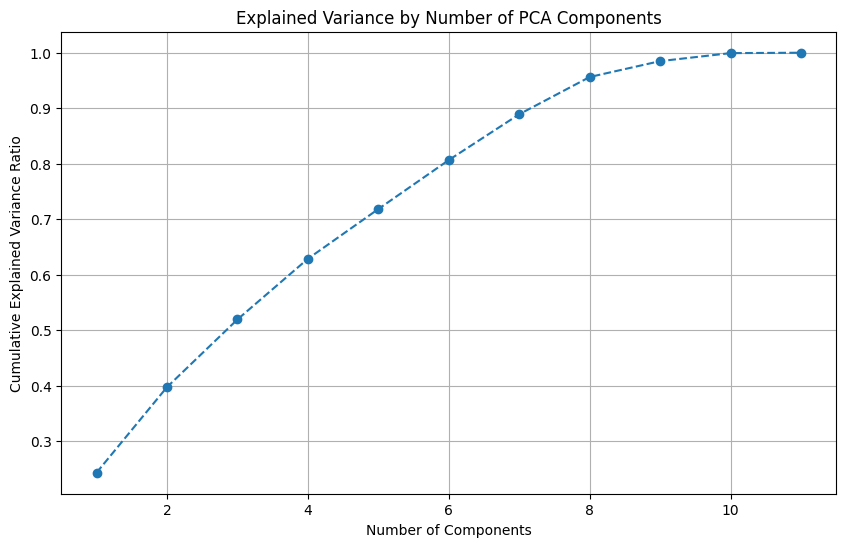

In [16]:
# PCA explained variance ratio plot

pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

#Explained Variance
The cumulative explained variance plot shows:

With 2 components: ~39.7% of total variance captured.
PC1: 24.3% – Primarily captures overall trends.
PC2: 15.4% – Captures secondary variations. The plot confirms that adding more components gradually increases the captured information form data.
Full PCA approaches 100% by 11 components, like it is expected.

#Dimensionality Reduction: PCA and t-SNE



In [17]:
# PCA
print("PCA Analysis")
pca = PCA(n_components=2) # Retain 2 principal components
X_pca = pca.fit_transform(X_scaled)

print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Feature importance in PCA components
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_cols
)
print("\nPCA Component Loadings:")
display(pca_components)

# Apply t-SNE
print("t-SNE Analysis\n")

# t-SNE hypers chosen
tsne = TSNE(n_components=2,random_state=42,perplexity=5,
            n_iter=1000, learning_rate='auto')

X_tsne = tsne.fit_transform(X_scaled)
print("\nt-SNE transformation completed")

PCA Analysis

Explained variance ratio: [0.24316611 0.1541743 ]
Total variance explained: 0.3973

PCA Component Loadings:


,PC1,PC2
season,0.472722,0.124392
yr,0.011198,-0.175689
mnth,0.427368,0.186735
holiday,-0.025568,-0.028252
weekday,-0.007354,-0.003601
workingday,0.043318,0.038809
weathersit,0.026519,0.616233
temp,0.481491,-0.328679
atemp,0.487803,-0.321506
hum,0.239078,0.561361


t-SNE Analysis



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



t-SNE transformation completed


# PCA component loadings



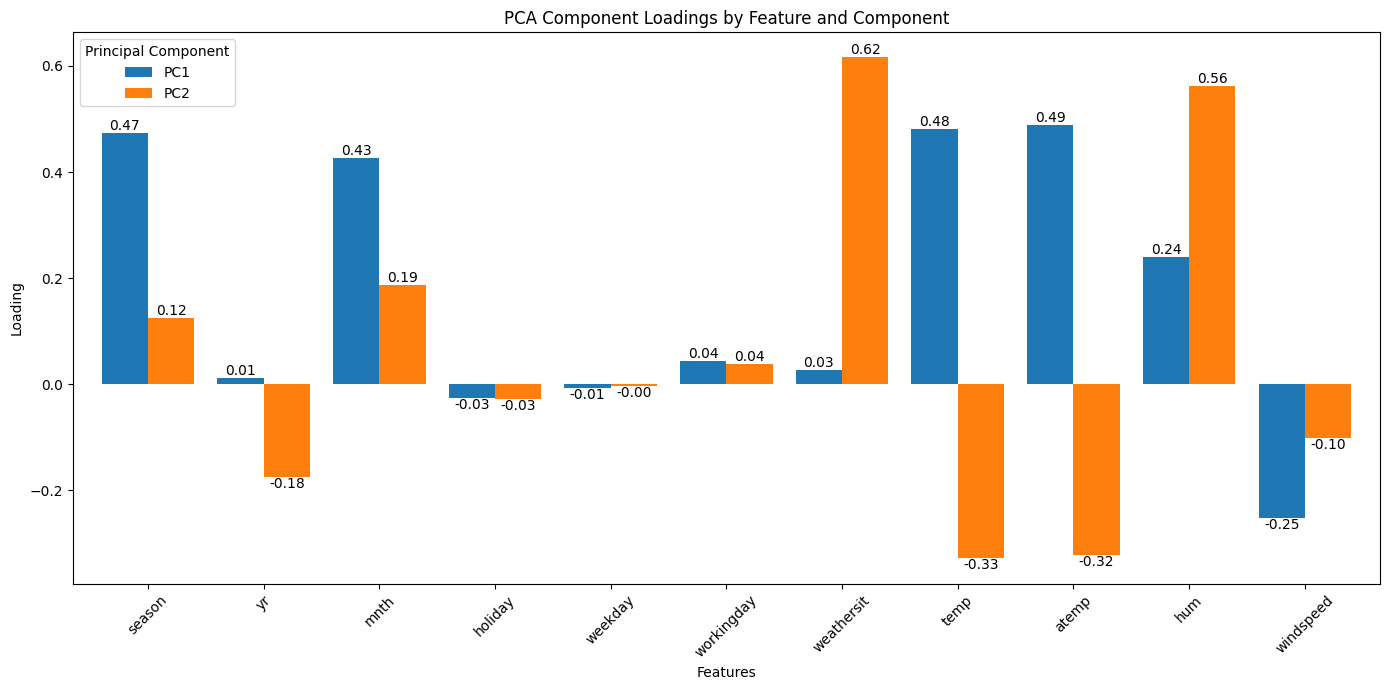

In [18]:
#  PCA component loadings
ax = pca_components.plot(kind='bar', figsize=(14, 7), rot=45, width=0.8)
plt.title('PCA Component Loadings by Feature and Component')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.legend(title='Principal Component')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.savefig('pca_loadings_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Loadings plot

 The first principal component is strongly influenced by temperature-related features, with normalized temperature contributing a loading of 0.48 and normalized feeling temperature contributing 0.49. Additionally, seasonal features show substantial contributions, with season loading at 0.47 and month loading at 0.43. PC1 represents a compound dimension capturing seasonal and temperature variations, which are naturally correlated in the dataset


 The second principal component exhibits a different pattern compared to the first one. Weather situation dominates this component with a loading of 0.62, while humidity contributes 0.56.

# Compare plots of PCA and t-SNE


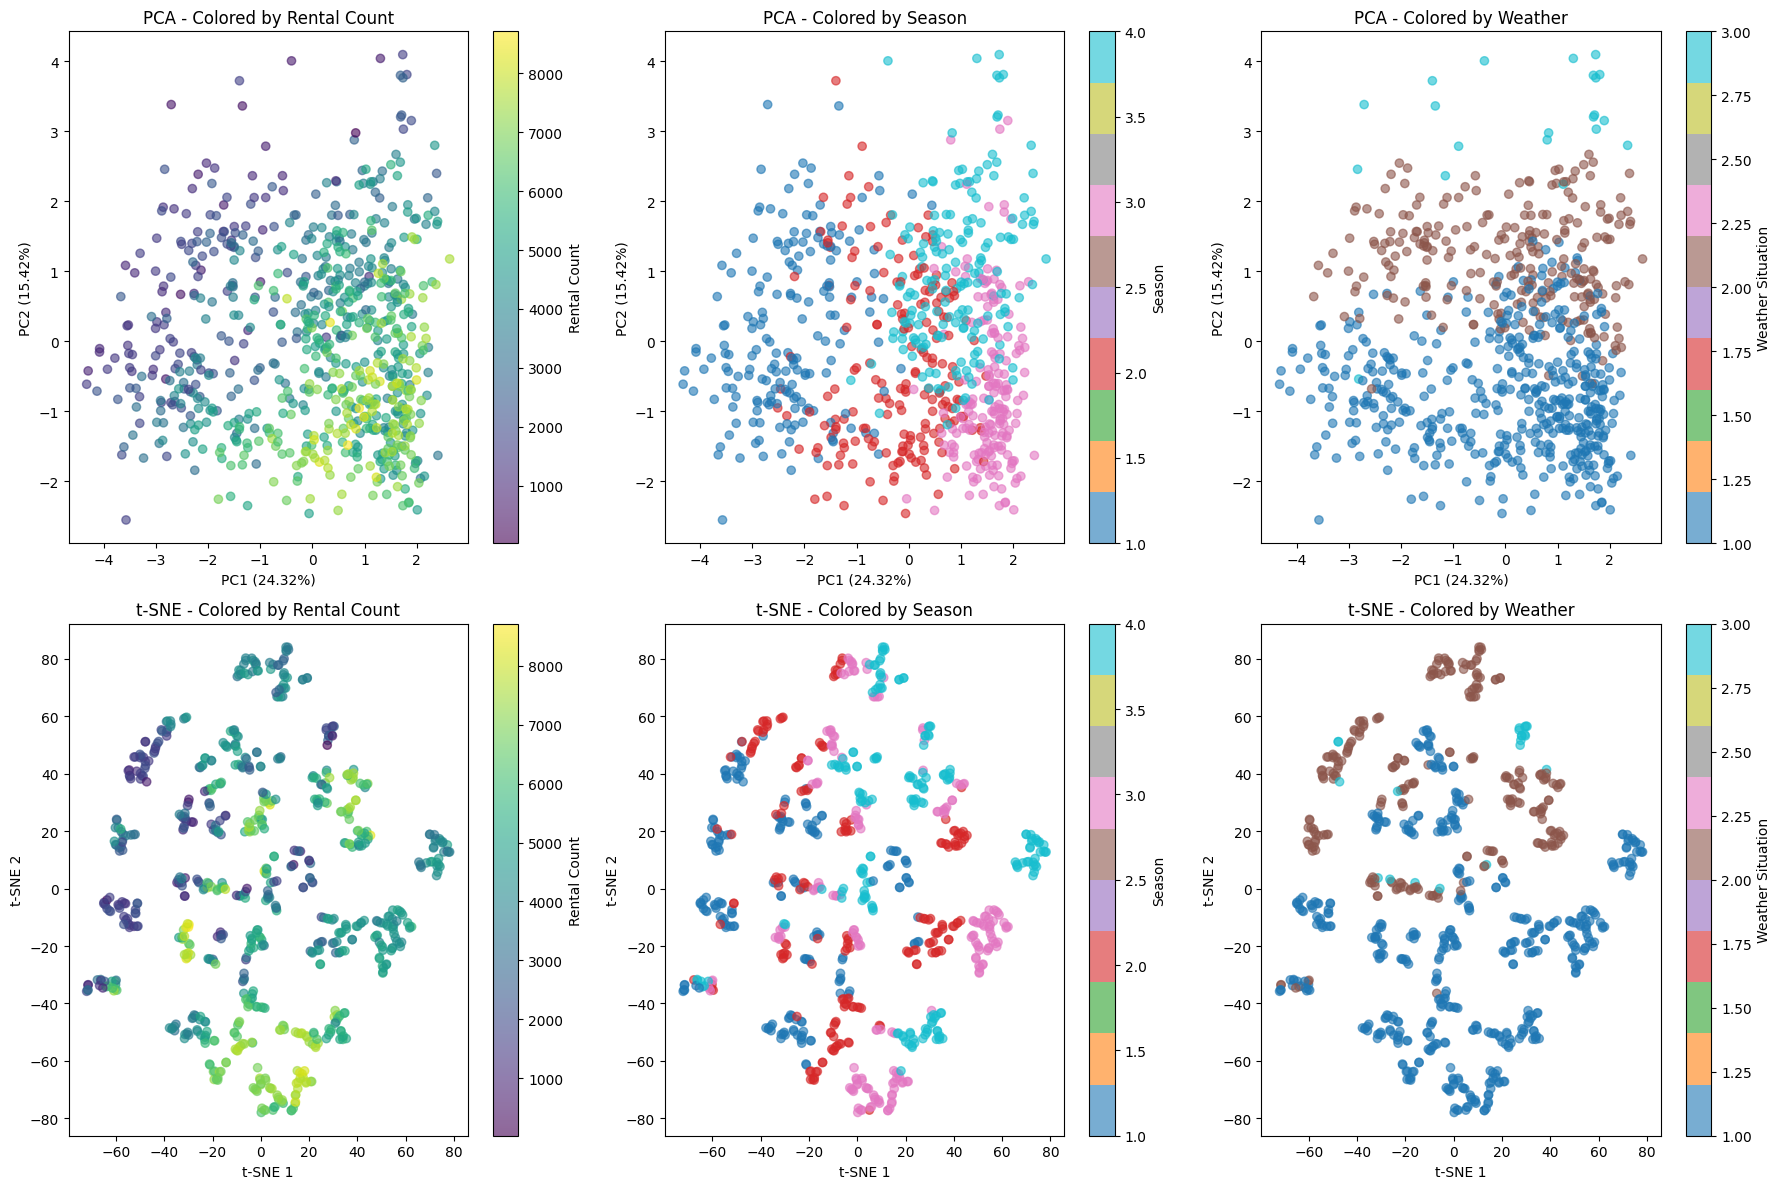

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# PCA visualizations
scatter1 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
axes[0, 0].set_title('PCA - Colored by Rental Count')
plt.colorbar(scatter1, ax=axes[0, 0], label='Rental Count')

scatter2 = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=df['season'], cmap='tab10', alpha=0.6)
axes[0, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[0, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
axes[0, 1].set_title('PCA - Colored by Season')
plt.colorbar(scatter2, ax=axes[0, 1], label='Season')

scatter3 = axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=df['weathersit'], cmap='tab10', alpha=0.6)
axes[0, 2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[0, 2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
axes[0, 2].set_title('PCA - Colored by Weather')
plt.colorbar(scatter3, ax=axes[0, 2], label='Weather Situation')

# t-SNE visualizations
scatter4 = axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')
axes[1, 0].set_title('t-SNE - Colored by Rental Count')
plt.colorbar(scatter4, ax=axes[1, 0], label='Rental Count')

scatter5 = axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['season'], cmap='tab10', alpha=0.6)
axes[1, 1].set_xlabel('t-SNE 1')
axes[1, 1].set_ylabel('t-SNE 2')
axes[1, 1].set_title('t-SNE - Colored by Season')
plt.colorbar(scatter5, ax=axes[1, 1], label='Season')

scatter6 = axes[1, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['weathersit'], cmap='tab10', alpha=0.6)
axes[1, 2].set_xlabel('t-SNE 1')
axes[1, 2].set_ylabel('t-SNE 2')
axes[1, 2].set_title('t-SNE - Colored by Weather')
plt.colorbar(scatter6, ax=axes[1, 2], label='Weather Situation')

plt.tight_layout()
plt.savefig('pca_tsne_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#Comparison plot results

The PCA visualizations demonstrate the strengths and limitations of linear dimensionality reduction. The scatter plots show a continuous, distribution of points without discrete cluster boundaries in all three plots in the upper row of the plot.

 When colored by rental count, the diagonal gradient from low to high values (dark to light colours) is clear and interpretable, indicating that the first principal component serves as a meaningful predictor of rental demand.

  Seasonal patterns are visible as overlapping clouds of points, with some separation between seasons but considerable mixing in the transitional regions. This indicates that while season is an important factor, PCA in 2 dimensions doesn't create perfectly distinct clusters for each season. The seasons tend to blend into each other in the reduced 2 dimensional space.
  
  
   Weather related patterns show a bit less overlap compared to seasonal trends. There are three distinctly different weather conditions occupying largely the three different regions of the PCA space whit some overlap in the middle. Weather conditions are dominated by PC2 as we can see as PC2 value decreases to negative weather situation tends to be dark blue.


   The t-SNE plot colored by rental count shows a different structure compared to PCA. Instead of a clear gradient it can be seen to be more localized groupings of similar rental counts.
   
   
   So it can be said that the t-SNE is better at preserving local relationships, so points with similar rental counts in the original high-dimensional space tend to stay closer together in the t-SNE embedding.



   The t-SNE plot colored by seasons shows the same structure as previous plot. The different seasons form tighter and more distinct clusters compared to the PCA representation, with reduced overlap between seasonal groups.
   
   Weather situation coloring demonstrates clearer separation of different weather conditions, with distinct clusters forming for different weather situations that were less apparent in the PCA space.


#Prediction Model Comparison




Original Features (11D):
  RMSE: 683.89
  MAE:  435.28
  R^2:   0.8834

PCA (2D):
  RMSE: 1264.37
  MAE:  1028.84
  R^2:   0.6013

t-SNE (2D):
  RMSE: 851.24
  MAE:  611.63
  R^2:   0.8193


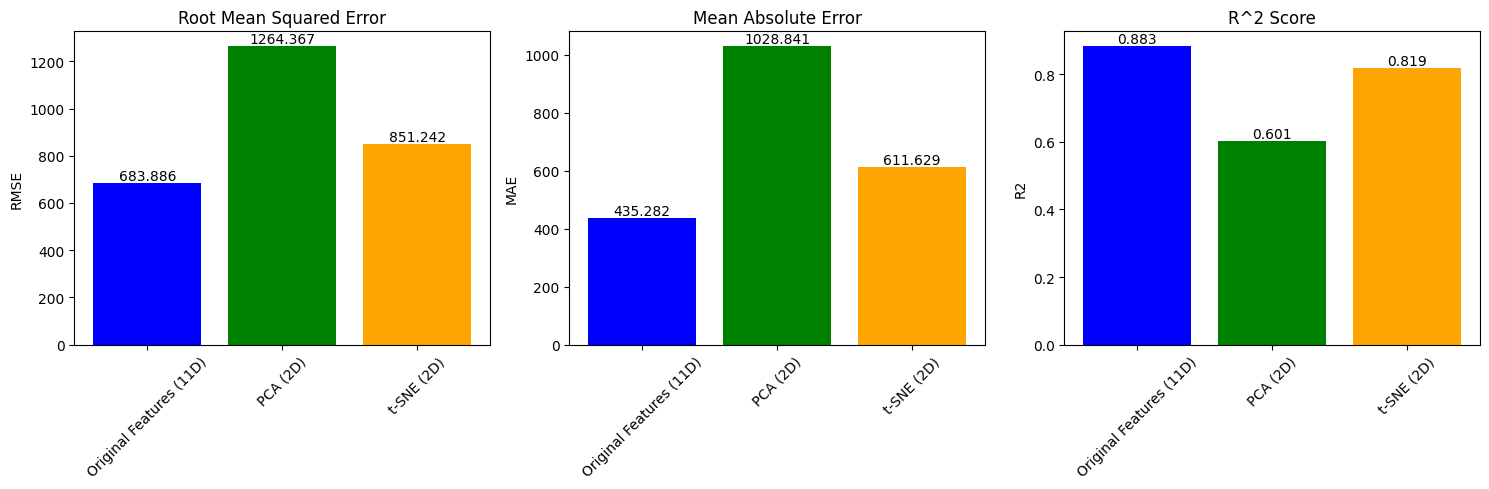

In [20]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_tsne_train, X_tsne_test, _, _ = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Function to train and evaluate model
def evaluate_model(X_train, X_test, y_train, y_test, name):
    model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  R^2:   {r2:.4f}")

    return {'name': name, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Evaluate three approaches
results = []
results.append(evaluate_model(X_train, X_test, y_train, y_test, "Original Features (11D)"))
results.append(evaluate_model(X_pca_train, X_pca_test, y_train, y_test, "PCA (2D)"))
results.append(evaluate_model(X_tsne_train, X_tsne_test, y_train, y_test, "t-SNE (2D)"))

# Create comparison plot
results_df = pd.DataFrame(results)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['rmse', 'mae', 'r2']
titles = ['Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    axes[idx].bar(results_df['name'], results_df[metric], color=['blue', 'green', 'orange'])
    axes[idx].set_title(title)
    axes[idx].set_ylabel(metric.upper())
    axes[idx].tick_params(axis='x', rotation=45)

    # Value bars
    for i, v in enumerate(results_df[metric]):
        axes[idx].text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary table analysis


The model trained on the original eleven-dimensional feature space achieved the best performance with an RMSE of 683.89, MAE of 435.28, and $R^2$ score of 0.883. This establishes the baseline performance for comparison when all information is retained to the model.


The model trained on the two-dimensional PCA representation showed substantial performance degradation, achieving an RMSE of 1264.37, MAE of 1028.84, and $R^2$ score of 0.601. This reduction in performance is expected. As explained variance is quite low with only 2 PCs, which capture below 40% of total variance.

The model trained on the two-dimensional t-SNE representation demonstrated intermediate performance with an RMSE of 859.71, MAE of 611.89, and $R^2$ score of 0.816. The t-SNE algorithm can be said to perform better compared to PCA with same amount of components. t-SNE preserves non-linear relationships in the data and results in 20% higher $R^2$ score compared to PCA despite the same two-dimensional reduction.